## Import Libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.7.1+cu118
CUDA available: True


## 1. Basic Gradients

### Scalar Functions - Single Variable

In [2]:
# f(x) = x^2
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2

print(f"x = {x.item()}")
print(f"y = x^2 = {y.item()}")

# Compute gradient dy/dx = 2x
y.backward()
print(f"\nGradient dy/dx = 2x = {x.grad.item()}")
print(f"Expected: 2 * {x.item()} = {2 * x.item()}")

x = 3.0
y = x^2 = 9.0

Gradient dy/dx = 2x = 6.0
Expected: 2 * 3.0 = 6.0


### Polynomial Functions

In [3]:
# f(x) = x^3 + 2x^2 + 3x + 1
x = torch.tensor(2.0, requires_grad=True)
y = x**3 + 2*x**2 + 3*x + 1

print(f"f(x) = x^3 + 2x^2 + 3x + 1")
print(f"f({x.item()}) = {y.item()}")

y.backward()
print(f"\nGradient f'(x) = 3x^2 + 4x + 3")
print(f"f'({x.item()}) = {x.grad.item()}")
print(f"Expected: 3*{x.item()}^2 + 4*{x.item()} + 3 = {3*x.item()**2 + 4*x.item() + 3}")

f(x) = x^3 + 2x^2 + 3x + 1
f(2.0) = 23.0

Gradient f'(x) = 3x^2 + 4x + 3
f'(2.0) = 23.0
Expected: 3*2.0^2 + 4*2.0 + 3 = 23.0


## 2. Vector Functions

### Gradient of Vector Input

In [4]:
# f(x) = x^T x (dot product)
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.dot(x, x)  # x^T x

print(f"x = {x}")
print(f"y = x^T x = {y.item()}")

y.backward()
print(f"\nGradient ∇f = 2x")
print(f"∇f = {x.grad}")
print(f"Expected 2x = {2 * x.data}")

x = tensor([1., 2., 3.], requires_grad=True)
y = x^T x = 14.0

Gradient ∇f = 2x
∇f = tensor([2., 4., 6.])
Expected 2x = tensor([2., 4., 6.])


### Quadratic Form: x^T A x

In [5]:
# f(x) = x^T A x
A = torch.tensor([[2.0, 1.0], [1.0, 3.0]])
x = torch.tensor([1.0, 2.0], requires_grad=True)

y = x @ A @ x
print(f"A = \n{A}")
print(f"x = {x}")
print(f"y = x^T A x = {y.item()}")

y.backward()
print(f"\nGradient ∇f = (A + A^T)x")
print(f"∇f = {x.grad}")
print(f"Expected (A + A^T)x = {((A + A.T) @ x.data)}")

A = 
tensor([[2., 1.],
        [1., 3.]])
x = tensor([1., 2.], requires_grad=True)
y = x^T A x = 18.0

Gradient ∇f = (A + A^T)x
∇f = tensor([ 8., 14.])
Expected (A + A^T)x = tensor([ 8., 14.])


## 3. Matrix Functions

### Trace of Matrix Product

In [6]:
# f(X) = tr(AX) where A is constant
A = torch.randn(3, 3)
X = torch.randn(3, 3, requires_grad=True)

y = torch.trace(A @ X)
print(f"f(X) = tr(AX) = {y.item():.4f}")

y.backward()
print(f"\nGradient ∇f = A^T")
print(f"∇f = \n{X.grad}")
print(f"\nExpected A^T = \n{A.T}")

f(X) = tr(AX) = -3.0505

Gradient ∇f = A^T
∇f = 
tensor([[ 1.3287, -0.3009,  0.5258],
        [ 0.3082, -0.0847,  1.3090],
        [ 0.6045, -0.5438,  0.6655]])

Expected A^T = 
tensor([[ 1.3287, -0.3009,  0.5258],
        [ 0.3082, -0.0847,  1.3090],
        [ 0.6045, -0.5438,  0.6655]])


### Frobenius Norm

In [7]:
# f(X) = ||X||_F^2 = tr(X^T X)
X = torch.randn(3, 3, requires_grad=True)
y = torch.norm(X, p='fro') ** 2

print(f"f(X) = ||X||_F^2 = {y.item():.4f}")

y.backward()
print(f"\nGradient ∇f = 2X")
print(f"∇f = \n{X.grad}")
print(f"\nExpected 2X = \n{2 * X.data}")

f(X) = ||X||_F^2 = 15.6495

Gradient ∇f = 2X
∇f = 
tensor([[ 1.5383,  4.7355,  2.1541],
        [-1.6790,  0.7005, -0.1310],
        [ 5.2010,  1.2736, -1.0801]])

Expected 2X = 
tensor([[ 1.5383,  4.7355,  2.1541],
        [-1.6790,  0.7005, -0.1310],
        [ 5.2010,  1.2736, -1.0801]])


## 4. Chain Rule

### Composite Functions

In [8]:
# f(x) = sin(x^2)
x = torch.tensor(1.0, requires_grad=True)
y = torch.sin(x ** 2)

print(f"f(x) = sin(x^2)")
print(f"f({x.item()}) = {y.item():.4f}")

y.backward()
print(f"\nGradient f'(x) = 2x * cos(x^2)")
print(f"f'({x.item()}) = {x.grad.item():.4f}")
print(f"Expected: 2*{x.item()}*cos({x.item()**2}) = {(2*x.item()*np.cos(x.item()**2)):.4f}")

f(x) = sin(x^2)
f(1.0) = 0.8415

Gradient f'(x) = 2x * cos(x^2)
f'(1.0) = 1.0806
Expected: 2*1.0*cos(1.0) = 1.0806


### Nested Functions

In [9]:
# f(x) = exp(log(x^2 + 1))
x = torch.tensor(2.0, requires_grad=True)
y = torch.exp(torch.log(x**2 + 1))

print(f"f(x) = exp(log(x^2 + 1))")
print(f"f({x.item()}) = {y.item():.4f}")

y.backward()
print(f"\nGradient f'(x) = 2x")
print(f"f'({x.item()}) = {x.grad.item():.4f}")

f(x) = exp(log(x^2 + 1))
f(2.0) = 5.0000

Gradient f'(x) = 2x
f'(2.0) = 4.0000


## 5. Jacobian Matrix

### Vector-Valued Functions

In [10]:
def f(x):
    """f: R^2 -> R^2, f(x) = [x1^2 + x2, x1 * x2]"""
    return torch.stack([x[0]**2 + x[1], x[0] * x[1]])

x = torch.tensor([2.0, 3.0], requires_grad=True)
y = f(x)

print(f"x = {x}")
print(f"f(x) = {y}")

# Compute Jacobian
jacobian = torch.autograd.functional.jacobian(f, x)
print(f"\nJacobian J = ")
print(jacobian)
print(f"\nExpected:")
print(f"[2*x1,   1  ] = [{2*x[0].item():.1f}, {1.0}]")
print(f"[ x2,   x1  ] = [{x[1].item():.1f}, {x[0].item():.1f}]")

x = tensor([2., 3.], requires_grad=True)
f(x) = tensor([7., 6.], grad_fn=<StackBackward0>)

Jacobian J = 
tensor([[4., 1.],
        [3., 2.]])

Expected:
[2*x1,   1  ] = [4.0, 1.0]
[ x2,   x1  ] = [3.0, 2.0]


### Matrix-Valued Functions

In [11]:
def matrix_func(x):
    """f: R^2 -> R^(2x2)"""
    return torch.tensor([[x[0]**2, x[0]*x[1]], 
                        [x[1]**2, x[0]+x[1]]])

x = torch.tensor([1.0, 2.0], requires_grad=True)
y = matrix_func(x)

print(f"x = {x}")
print(f"f(x) = \n{y}")


# Compute Jacobian
jacobian = torch.autograd.functional.jacobian(matrix_func, x)
print(f"\nJacobian shape: {jacobian.shape}")
print(f"Jacobian:\n{jacobian}")

x = tensor([1., 2.], requires_grad=True)
f(x) = 
tensor([[1., 2.],
        [4., 3.]])

Jacobian shape: torch.Size([2, 2, 2])
Jacobian:
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])


## 6. Hessian Matrix

### Second-Order Derivatives

In [12]:
# f(x, y) = x^2 + xy + y^2
def f(x):
    return x[0]**2 + x[0]*x[1] + x[1]**2

x = torch.tensor([1.0, 2.0], requires_grad=True)
y = f(x)

print(f"f(x) = x1^2 + x1*x2 + x2^2")
print(f"f({x[0].item()}, {x[1].item()}) = {y.item()}")

# Compute Hessian
hessian = torch.autograd.functional.hessian(f, x)
print(f"\nHessian H = ")
print(hessian)
print(f"\nExpected:")
print("[2, 1]")
print("[1, 2]")

f(x) = x1^2 + x1*x2 + x2^2
f(1.0, 2.0) = 7.0

Hessian H = 
tensor([[2., 1.],
        [1., 2.]])

Expected:
[2, 1]
[1, 2]


### Quadratic Function Hessian

In [13]:
# f(x) = 1/2 x^T A x where A is symmetric
A = torch.tensor([[2.0, 1.0], [1.0, 3.0]])

def quadratic(x):
    return 0.5 * x @ A @ x

x = torch.tensor([1.0, 1.0], requires_grad=True)
y = quadratic(x)

print(f"f(x) = 1/2 x^T A x")
print(f"A = \n{A}")
print(f"f(x) = {y.item()}")

# Hessian should equal A
hessian = torch.autograd.functional.hessian(quadratic, x)
print(f"\nHessian H = ")
print(hessian)
print(f"\nExpected H = A:")
print(A)

f(x) = 1/2 x^T A x
A = 
tensor([[2., 1.],
        [1., 3.]])
f(x) = 3.5

Hessian H = 
tensor([[2., 1.],
        [1., 3.]])

Expected H = A:
tensor([[2., 1.],
        [1., 3.]])


## 7. Directional Derivatives

In [14]:
# Directional derivative: D_v f(x) = ∇f(x) · v
x = torch.tensor([1.0, 2.0], requires_grad=True)
v = torch.tensor([1.0, 0.0])  # Direction vector

# Function f(x,y) = x^2 + y^2
y = x[0]**2 + x[1]**2

print(f"f(x,y) = x^2 + y^2")
print(f"Point x = {x}")
print(f"Direction v = {v}")

# Compute gradient
y.backward()
grad = x.grad
print(f"\nGradient ∇f = {grad}")

# Directional derivative
dir_deriv = torch.dot(grad, v)
print(f"Directional derivative D_v f = ∇f · v = {dir_deriv.item()}")

f(x,y) = x^2 + y^2
Point x = tensor([1., 2.], requires_grad=True)
Direction v = tensor([1., 0.])

Gradient ∇f = tensor([2., 4.])
Directional derivative D_v f = ∇f · v = 2.0


## 8. Gradient Descent Example

### Minimizing a Quadratic Function

In [15]:
# Minimize f(x) = (x-2)^2 + (y-3)^2
x = torch.tensor([0.0, 0.0], requires_grad=True)
learning_rate = 0.1
iterations = 50

history = []

for i in range(iterations):
    # Compute function
    y = (x[0] - 2)**2 + (x[1] - 3)**2
    history.append((x.data.clone(), y.item()))
    
    # Compute gradients
    if x.grad is not None:
        x.grad.zero_()
    y.backward()
    
    # Update parameters
    with torch.no_grad():
        x -= learning_rate * x.grad
    
    if i % 10 == 0:
        print(f"Iter {i}: x = [{x[0].item():.4f}, {x[1].item():.4f}], f(x) = {y.item():.4f}")

print(f"\nFinal: x = [{x[0].item():.4f}, {x[1].item():.4f}]")
print(f"Expected minimum: [2.0, 3.0]")

Iter 0: x = [0.4000, 0.6000], f(x) = 13.0000
Iter 10: x = [1.8282, 2.7423], f(x) = 0.1499
Iter 20: x = [1.9816, 2.9723], f(x) = 0.0017
Iter 30: x = [1.9980, 2.9970], f(x) = 0.0000
Iter 40: x = [1.9998, 2.9997], f(x) = 0.0000

Final: x = [2.0000, 3.0000]
Expected minimum: [2.0, 3.0]


### Visualize Gradient Descent Path

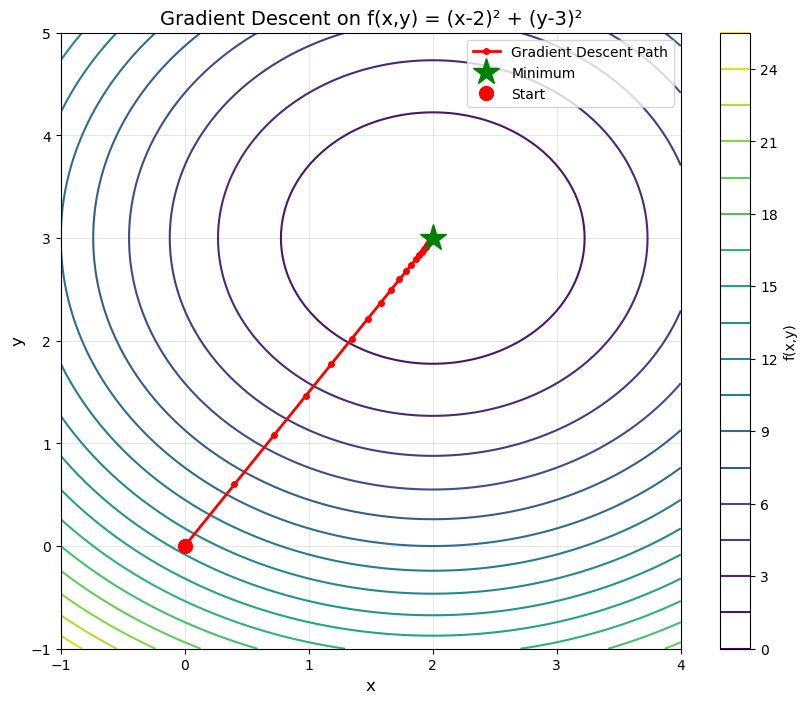

In [16]:
# Extract path
path = torch.stack([h[0] for h in history])

# Create contour plot
x_vals = torch.linspace(-1, 4, 100)
y_vals = torch.linspace(-1, 5, 100)
X, Y = torch.meshgrid(x_vals, y_vals, indexing='ij')
Z = (X - 2)**2 + (Y - 3)**2

plt.figure(figsize=(10, 8))
plt.contour(X.numpy(), Y.numpy(), Z.numpy(), levels=20, cmap='viridis')
plt.colorbar(label='f(x,y)')
plt.plot(path[:, 0].numpy(), path[:, 1].numpy(), 'r.-', linewidth=2, markersize=8, label='Gradient Descent Path')
plt.plot(2, 3, 'g*', markersize=20, label='Minimum')
plt.plot(0, 0, 'ro', markersize=10, label='Start')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Gradient Descent on f(x,y) = (x-2)² + (y-3)²', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 9. Newton's Method

### Second-Order Optimization

In [17]:
# Newton's method: x_{k+1} = x_k - H^{-1} ∇f
def f_scalar(x):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1]

x = torch.tensor([5.0, 5.0], requires_grad=True)
iterations = 10

print("Newton's Method for optimization:")
print(f"f(x,y) = x^2 + 2y^2 + xy\n")

for i in range(iterations):
    # Compute gradient and Hessian
    grad = torch.autograd.functional.jacobian(f_scalar, x)
    hess = torch.autograd.functional.hessian(f_scalar, x)
    
    # Newton update
    delta = torch.linalg.solve(hess, grad)
    x_new = x - delta
    
    f_val = f_scalar(x)
    print(f"Iter {i}: x = [{x[0].item():.6f}, {x[1].item():.6f}], f(x) = {f_val:.8f}")
    
    x = x_new.detach().requires_grad_(True)
    
    # Check convergence
    if torch.norm(delta) < 1e-10:
        print(f"\nConverged at iteration {i}")
        break

print(f"\nFinal: x = [{x[0].item():.10f}, {x[1].item():.10f}]")
print(f"Expected minimum: [0.0, 0.0]")

Newton's Method for optimization:
f(x,y) = x^2 + 2y^2 + xy

Iter 0: x = [5.000000, 5.000000], f(x) = 100.00000000
Iter 1: x = [0.000000, 0.000000], f(x) = 0.00000000

Converged at iteration 1

Final: x = [0.0000000000, 0.0000000000]
Expected minimum: [0.0, 0.0]


## 10. Backpropagation in Neural Networks

### Simple Neural Network

In [18]:
# Two-layer neural network
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 3)
        self.layer2 = nn.Linear(3, 1)
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Create model and data
model = SimpleNet()
x = torch.tensor([[1.0, 2.0]])
y_true = torch.tensor([[5.0]])

# Forward pass
y_pred = model(x)
loss = (y_pred - y_true)**2

print(f"Input: {x}")
print(f"Predicted: {y_pred.item():.4f}")
print(f"True: {y_true.item()}")
print(f"Loss: {loss.item():.4f}")

# Backward pass
loss.backward()

print("\nGradients:")
for name, param in model.named_parameters():
    print(f"{name}: {param.grad}")

Input: tensor([[1., 2.]])
Predicted: 0.3684
True: 5.0
Loss: 21.4518

Gradients:
layer1.weight: tensor([[3.2211, 6.4423],
        [0.0000, 0.0000],
        [0.0000, 0.0000]])
layer1.bias: tensor([3.2211, 0.0000, 0.0000])
layer2.weight: tensor([[-3.0614,  0.0000,  0.0000]])
layer2.bias: tensor([-9.2632])


## 11. Matrix Derivatives - Common Formulas

### Linear Function

In [19]:
# ∇(a^T x) = a
a = torch.tensor([1.0, 2.0, 3.0])
x = torch.tensor([2.0, 1.0, 0.5], requires_grad=True)

y = torch.dot(a, x)
print(f"f(x) = a^T x = {y.item()}")

y.backward()
print(f"\n∇f = a")
print(f"∇f = {x.grad}")
print(f"Expected: {a}")

f(x) = a^T x = 5.5

∇f = a
∇f = tensor([1., 2., 3.])
Expected: tensor([1., 2., 3.])


### Matrix-Vector Product

In [20]:
# ∇(x^T A x) = (A + A^T)x
A = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
x = torch.tensor([1.0, 1.0], requires_grad=True)

y = x @ A @ x
print(f"f(x) = x^T A x = {y.item()}")

y.backward()
print(f"\n∇f = (A + A^T)x")
print(f"∇f = {x.grad}")
print(f"Expected: {(A + A.T) @ x.data}")

f(x) = x^T A x = 10.0

∇f = (A + A^T)x
∇f = tensor([ 7., 13.])
Expected: tensor([ 7., 13.])


### Determinant Gradient

In [21]:
# ∇ log|det(X)| = X^{-T}
X = torch.tensor([[2.0, 1.0], [1.0, 2.0]], requires_grad=True)

y = torch.log(torch.linalg.det(X))
print(f"f(X) = log|det(X)| = {y.item():.4f}")

y.backward()
print(f"\n∇f = X^{{-T}}")
print(f"∇f = \n{X.grad}")
print(f"\nExpected X^{{-T}} = \n{torch.linalg.inv(X.data).T}")


f(X) = log|det(X)| = 1.0986

∇f = X^{-T}
∇f = 
tensor([[ 0.6667, -0.3333],
        [-0.3333,  0.6667]])

Expected X^{-T} = 
tensor([[ 0.6667, -0.3333],
        [-0.3333,  0.6667]])


## 12. Visualization: Gradient Fields

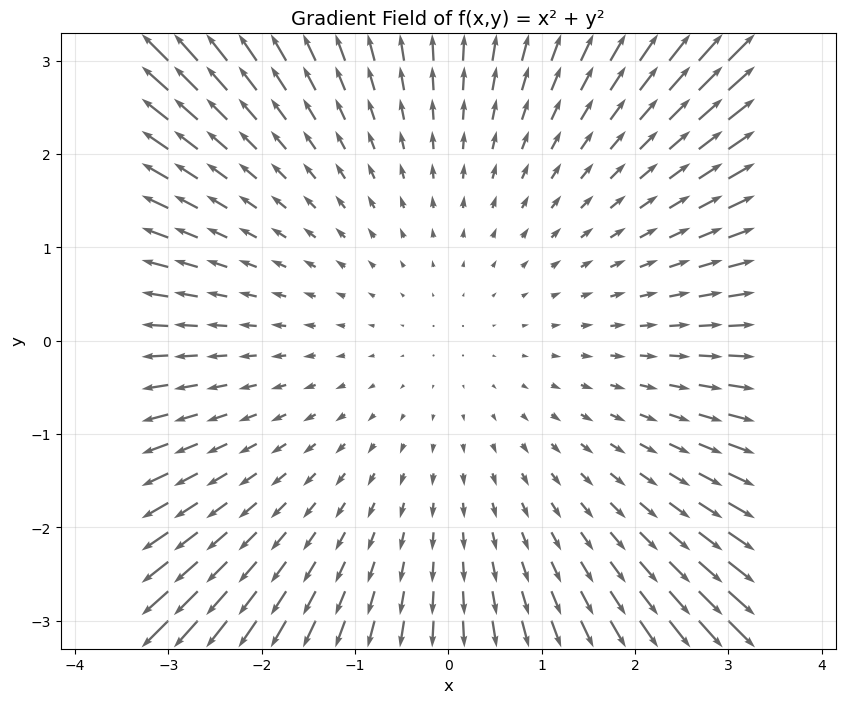

In [22]:
# Visualize gradient field for f(x,y) = x^2 + y^2
x = torch.linspace(-3, 3, 20)
y = torch.linspace(-3, 3, 20)
X, Y = torch.meshgrid(x, y, indexing='ij')

# Compute gradient at each point
U = 2 * X  # ∂f/∂x = 2x
V = 2 * Y  # ∂f/∂y = 2y

plt.figure(figsize=(10, 8))
plt.quiver(X.numpy(), Y.numpy(), U.numpy(), V.numpy(), alpha=0.6)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Gradient Field of f(x,y) = x² + y²', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

## 13. 3D Surface and Gradients

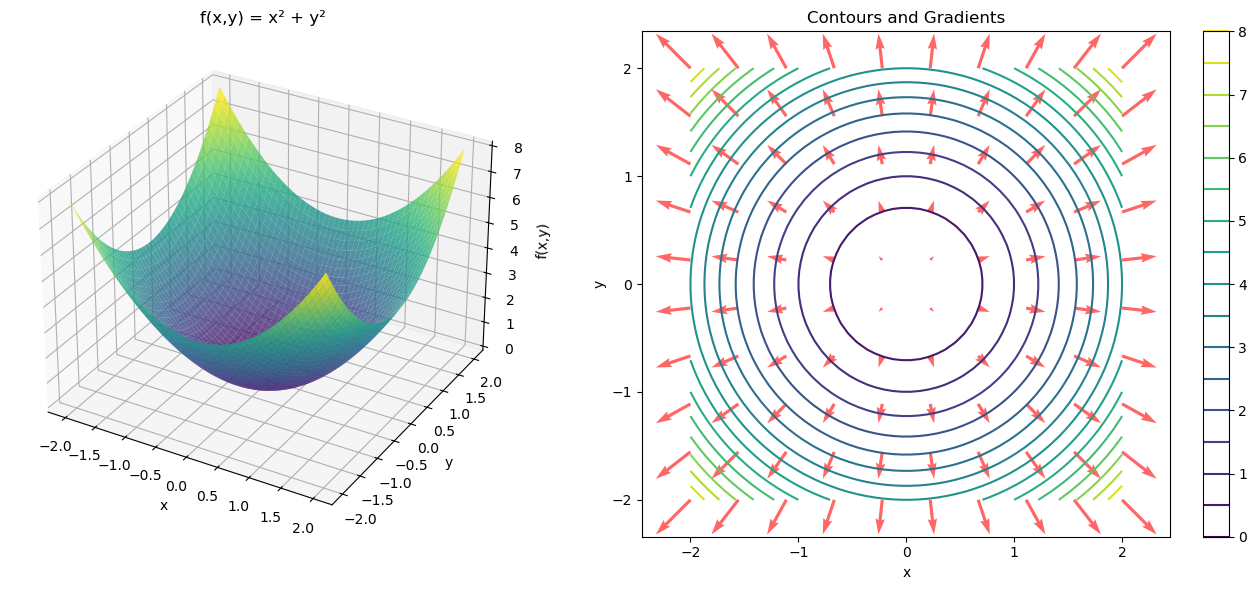

In [23]:
# 3D visualization of function and gradient
x = torch.linspace(-2, 2, 50)
y = torch.linspace(-2, 2, 50)
X, Y = torch.meshgrid(x, y, indexing='ij')
Z = X**2 + Y**2

fig = plt.figure(figsize=(14, 6))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X.numpy(), Y.numpy(), Z.numpy(), cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('f(x,y) = x² + y²')

# Contour with gradient vectors
ax2 = fig.add_subplot(122)
contour = ax2.contour(X.numpy(), Y.numpy(), Z.numpy(), levels=15, cmap='viridis')
plt.colorbar(contour, ax=ax2)

# Add some gradient vectors
x_grad = torch.linspace(-2, 2, 10)
y_grad = torch.linspace(-2, 2, 10)
X_grad, Y_grad = torch.meshgrid(x_grad, y_grad, indexing='ij')
U_grad = 2 * X_grad
V_grad = 2 * Y_grad

ax2.quiver(X_grad.numpy(), Y_grad.numpy(), U_grad.numpy(), V_grad.numpy(), alpha=0.6, color='red')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contours and Gradients')
ax2.axis('equal')

plt.tight_layout()
plt.show()

## 14. Practical Application: Linear Regression

In [24]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.randn(100, 1)
y_true = 3 * X + 2 + 0.5 * torch.randn(100, 1)

# Initialize parameters
w = torch.zeros(1, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Training
learning_rate = 0.01
epochs = 100

losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = X @ w + b
    loss = ((y_pred - y_true)**2).mean()
    losses.append(loss.item())
    
    # Backward pass
    if w.grad is not None:
        w.grad.zero_()
        b.grad.zero_()
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}, w = {w.item():.4f}, b = {b.item():.4f}")

print(f"\nFinal: w = {w.item():.4f}, b = {b.item():.4f}")
print(f"Expected: w ≈ 3.0, b ≈ 2.0")

Epoch 0: Loss = 13.7270, w = 0.0605, b = 0.0439
Epoch 20: Loss = 6.0646, w = 1.0445, b = 0.7480
Epoch 40: Loss = 2.7434, w = 1.6990, b = 1.2020
Epoch 60: Loss = 1.3026, w = 2.1346, b = 1.4944
Epoch 80: Loss = 0.6770, w = 2.4247, b = 1.6826

Final: w = 2.6101, b = 1.7986
Expected: w ≈ 3.0, b ≈ 2.0


### Visualize Results

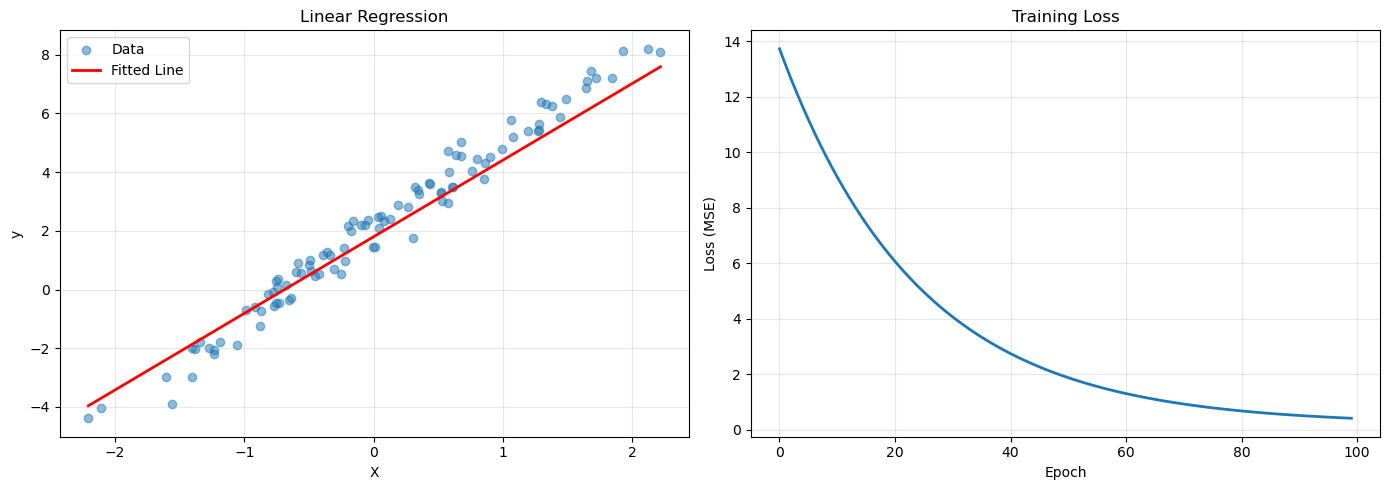

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot data and fitted line
axes[0].scatter(X.numpy(), y_true.numpy(), alpha=0.5, label='Data')
X_line = torch.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = (X_line @ w + b).detach()
axes[0].plot(X_line.numpy(), y_line.numpy(), 'r-', linewidth=2, label='Fitted Line')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].set_title('Linear Regression')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot loss curve
axes[1].plot(losses, linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Training Loss')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()